В цьому домашньому завданні ми проведемо додаткові експерименти для рішення задачі бінарної класифікації і створимо ваш новий submission на змагання на Kaggle.

-----------


**Завдання 0**. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0). Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

**Завдання 1**. **Збираємо весь код з попереднього ДЗ в одному місці.** В лекційному ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb` ми познайомились з поняттям пайплайнів, а також я показала, як компактно виглядає рішення МЛ задачі, якщо ми зберемо весь код разом.

Оскільки ми далі будемо робити експерименти, які включають ті самі етапи попередньої обробки, але інше моделювання - буде зручно мати весь код компактно і під рукою. Тому зараз ми займемось збором коду до купи :) Після цього завдання для подальших експериментів ви можете перенести частини розвʼязку взагалі в окремий `.py` файл, аби було зручно імпортувати функції.

Зі свого рішення в попередньому домашньому завданні (`Логістична регресія з scikit learn.ipynb`) зберіть усі кроки розвʼязку задачі разом з використанням `sklearn.Pipeline` за прикладом з лекції.

Ваш код нижче має містити
1. Читання даних з файлу (поза пайплайном).
2. Розбиття на тренувальний і валідаційний набори, де валідаційний містить 20% даних (поза пайплайном).
3. Виділення категоріальних і числових колонок (поза пайплайном).
4. Підготовку категоріальних і числових колонок (частина пайплайну). В прикладі в лекції ми оформлювали обробку числових і категоріальних колонок в окремі трансформери `numeric_transformer`, `categorical_cols`. Рекоемндую зробити саме так, так потім зручніше вносити зміни :)
5. Тренування лог регресії (частина пайплайну).
6. Запуск пайплайну на тренування на трен. даних (поза пайплайном).
7. Запуск пайплайну на передбачення на трен і вал. даних і вимір метрик якості ROC-AUC + вивдення Confusion Matrix (поза пайплайном).
8. Збереження моделі в формат joblib (поза пайплайном).

Ви це все вже зробили в попереднтьому ДЗ! Тож, тут просто заадча все зібрати разом.

Нижче я додала підказки, що покроково ви маєте зробити. Якщо ви почуваєтесь впевнено, можете видалити ці підказки і реалізувати все самостійно, або ж - просто заповнити пропуски.

Завдання оцінюється в 10 балів. Головний результат - аби код в фіналі був робочий. Бо за не робочий нам гроші ніхто не заплатить :)

In [6]:
#імпортуємо необхідні бібліотеки

# import opendatasets as od
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.pipeline import Pipeline
import operator
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import f1_score, roc_curve, confusion_matrix, auc, r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
import joblib
from IPython.display import display

In [7]:
# завантажуємо датасет з Kaggle

#dataset_url = 'https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu/data'
#od.download(dataset_url)
#data_dir = './bank-customer-churn-prediction-dlu'
#os.listdir(data_dir)
#raw_df_url = '{}train.csv'.format(data_dir)



raw_df_url="https://raw.githubusercontent.com/roldugina/data_analysis_projects/f47c27543e7be8c6e77a7c8fcc7939011b0a2dae/train.csv"
raw_df=pd.read_csv(raw_df_url, index_col = 0)

Мітки класів в тренувальній вибірці
 Exited
0.0    0.7965
1.0    0.2035
Name: proportion, dtype: float64 

Мітки класів в валідаційній вибірці
 Exited
0.0    0.796667
1.0    0.203333
Name: proportion, dtype: float64 

Тип змінних: вхідні незалежні. ['Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
Тип змінних: числові. ['Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
Тип змінних: категоріальні. ['Geography', 'Gender']
Тип змінних: цільова. Exited
Area under ROC score on Train dataset: 88.09%



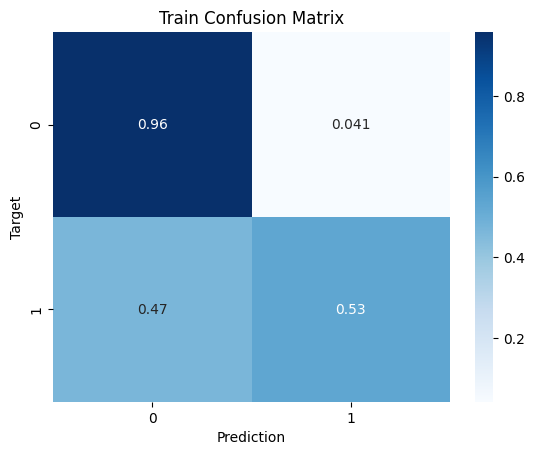

Area under ROC score on Validation dataset: 87.96%



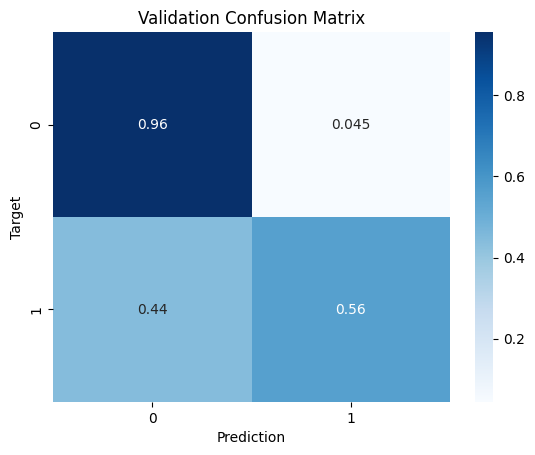

['bank_churn_model.joblib']

In [8]:
# завантажуємо датасет

# варіант 1 - з Kaggle

#dataset_url = 'https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu/data'
#od.download(dataset_url)
#data_dir = './bank-customer-churn-prediction-dlu'
#os.listdir(data_dir)
#raw_df_url = '{}train.csv'.format(data_dir)

# варіант 2 - з Github

raw_df_url="https://raw.githubusercontent.com/roldugina/data_analysis_projects/f47c27543e7be8c6e77a7c8fcc7939011b0a2dae/train.csv"

# Зчитуємо файл в датафрейм

raw_df=pd.read_csv(raw_df_url, index_col = 0)

# Розбиваємо на тренувальну та валідаційну вибірки

train_df, val_df = train_test_split(raw_df, test_size = 0.2, random_state = 12, stratify = raw_df.Exited )
print('Мітки класів в тренувальній вибірці\n',train_df.Exited.value_counts(normalize = True),'\n')
print('Мітки класів в валідаційній вибірці\n',val_df.Exited.value_counts(normalize = True), '\n')

# Створюємо перелік вхідних та цільових колонок

input_cols = train_df.columns.tolist()[:-1]
target_col = train_df.columns.tolist()[-1]

# Виявляємо числові і категоріальні колонки

numeric_cols = train_df.select_dtypes(include = np.number).columns.tolist()[:-1]
categorical_cols = train_df.select_dtypes(include = 'object').columns.tolist()

# Видаляємо колонки, нерелевантні для моделі, з переліку вхідних даних (input_cols, numeric_cols, categorical_cols)

def del_cols(col_list, delete_cols, name):

    for col in delete_cols:
      if col in col_list:
        col_list.remove(col)
    print(f'Тип змінних: {name}. {col_list}')

    return col_list

# Перелік колонок для зміни типів та видалення нерелевантних змінних

delete_cols = ['id', 'CustomerId', 'Surname','CreditScore']

# Формуємо остаточний перелік колонок для моделі

del_cols(input_cols, delete_cols, 'вхідні незалежні')
del_cols(numeric_cols, delete_cols, 'числові')
del_cols(categorical_cols, delete_cols, 'категоріальні')
print(f'Тип змінних: цільова. {target_col}')

# Створюємо трен. і вал. набори

train_inputs = train_df[input_cols]
train_targets = train_df[target_col]
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

# Створюємо трансформери для числових і категоріальних колонок
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

# Комбінуємо трансформери для різних типів колонок в один препроцесор
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Стоврюємо пайплайн, який спочатку запускає препроцесинг, потім тренуєм модель
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))
])

# Тренуємо пайплайн
model_pipeline.fit(train_inputs, train_targets)

# Функція, щоб передбачати і рахувати метрики
def predict_and_plot(model_pipeline, inputs, targets, name=''):
    preds = model_pipeline.predict(inputs)

    # Predict probabilities
    pred_proba = model_pipeline.predict_proba(inputs)[:, 1]

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(targets, pred_proba, pos_label=1)

    # Compute AUROC
    roc_auc = auc(fpr, tpr)
    print(f"Area under ROC score on {name} dataset: {roc_auc:.2%}\n")

    confusion_matrix_ = confusion_matrix(targets, preds, normalize='true')

    plt.figure()
    sns.heatmap(confusion_matrix_, annot=True, cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))
    plt.show()
    return preds, pred_proba

# Оцінюємо модель на трен і вал даних
train_preds, train_proba = predict_and_plot(model_pipeline, train_inputs, train_targets, 'Train')
val_preds, val_proba = predict_and_plot(model_pipeline, val_inputs, val_targets, 'Validation')

# Зберігаємо модель для подальшого використання
joblib.dump(model_pipeline, 'bank_churn_model.joblib')

**Завдання 2**. Такс, у нас з вами є вже готовий пайплайн. Давайте проведемо нові експерименти.

  Додайте в попередню обробку числових колонок генерацію polinomal features до степені 2 включно. Для цього створіть новий препроцесор і створіть новий пайплайн.

  Запустіть пайплайн на тренування і виведіть метрики для тренувального і валідаційного набору. Напишіть, як вам модель? Чи спостерігається в цій моделі overfit чи underfit? Чи ця модель добре генералізує?

In [9]:
# Створення та навчання пайплайну поліноміальної моделі

def create_and_fit_polynomial_pipeline(deg, numeric_cols, categorical_cols, train_inputs, train_targets, type):

  numeric_transformer = Pipeline(steps=[
      ('scaler', MinMaxScaler()),
      ('poly_features', PolynomialFeatures(degree = deg))
  ])

  categorical_transformer = Pipeline(steps=[
      ('onehot', OneHotEncoder(sparse_output = False, handle_unknown = 'ignore'))
  ])

  preprocessor = ColumnTransformer(
      transformers=[
          ('num', numeric_transformer, numeric_cols),
          ('cat', categorical_transformer, categorical_cols)
      ])

  if type == 'log':

     model_pipeline = Pipeline(steps=[
         ('preprocessor', preprocessor),
         ('classifier', LogisticRegression(solver='liblinear'))
     ])
  else:

     model_pipeline = Pipeline(steps=[
         ('preprocessor', preprocessor),
         ('solver', LinearRegression())
     ])

  model_pipeline.fit(train_inputs, train_targets)

  return model_pipeline

In [10]:
model_pipeline_poly2 = create_and_fit_polynomial_pipeline(2, numeric_cols, categorical_cols, train_inputs, train_targets, 'log')

Area under ROC score on Train dataset: 92.10%



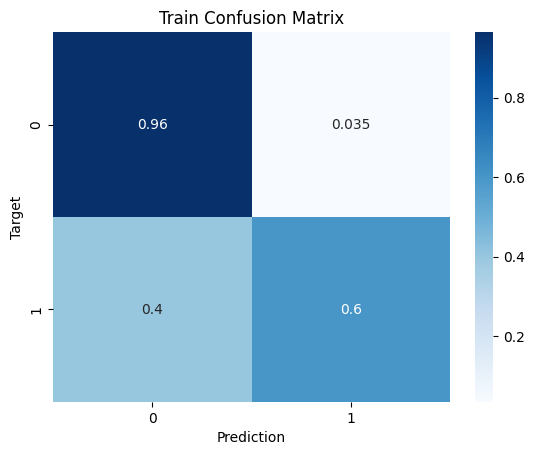

Area under ROC score on Validation dataset: 92.08%



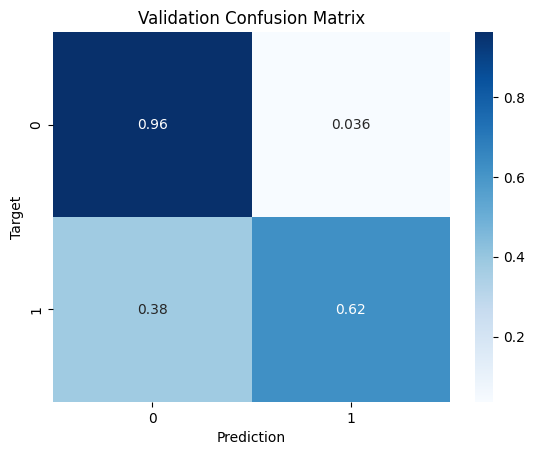

In [11]:
# Робимо передбачення на тренувальних та валідаційних даних

train_preds_poly2, train_proba_poly2 = predict_and_plot(model_pipeline_poly2, train_inputs, train_targets, 'Train')
val_preds_poly2, val_proba_poly2 = predict_and_plot(model_pipeline_poly2, val_inputs, val_targets, 'Validation')

**Висновки**

1. Модель з поліноміальними ознаками краща, ніж лінійна регресія (AUROC на валідаційному наборі 92,08% проти 87,96%).

2. Так, на мою думку, модель з 2-ма поліноміальними ознаками добре генералізує.
Underfit немає.
Overfit також (AUROC на валідаційному наборі даних майже дорівнює на тренувальному: 92,08% на валідаційному проти 92,1 на тренувальному).

**Завдання 3**. Тепер давайте створимо ще новий пайплайн, тільки тепер поліноміальні ознаки згенеруємо до степені 4. Зробіть висновок про якість моделі. Якщо вам подобається резульат якоїсь з моделей в цьому ДЗ - рекомендую зробити submission в змаганні.

In [12]:
# Навчаємо поліноміальну модель з 4 ознаками

model_pipeline_poly4 = create_and_fit_polynomial_pipeline(4, numeric_cols, categorical_cols, train_inputs, train_targets, 'log')

Area under ROC score on Train dataset: 93.19%



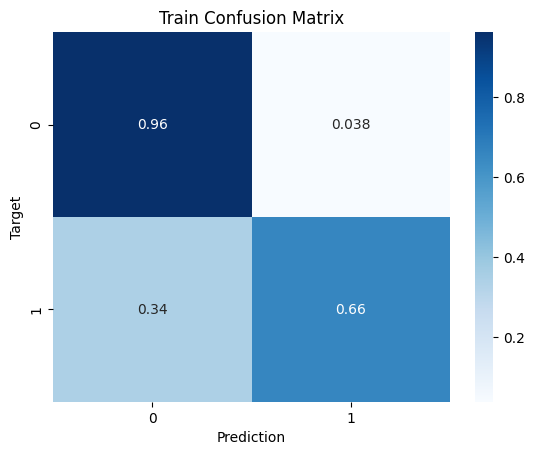

Area under ROC score on Validation dataset: 92.97%



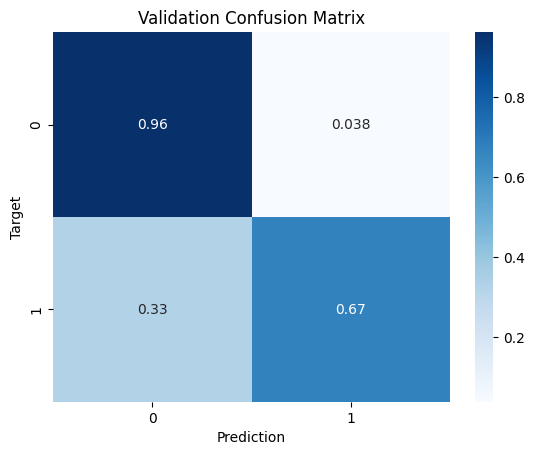

In [13]:
# Робимо передбачення на тренувальних та валідаційних даних

train_preds_poly4, train_proba_poly4 = predict_and_plot(model_pipeline_poly4, train_inputs, train_targets, 'Train')
val_preds_poly4, val_proba_poly4 = predict_and_plot(model_pipeline_poly4, val_inputs, val_targets, 'Validation')

In [14]:
# Завантажуємо тестові дані (на вибір з Github або Kaggle

test_raw_df_url = "https://raw.githubusercontent.com/roldugina/data_analysis_projects/f47c27543e7be8c6e77a7c8fcc7939011b0a2dae/test.csv"
#test_raw_df = '{}/test.csv'.format(datadir)

test_raw_df = pd.read_csv(test_raw_df_url)

# Робимо передбачення на тестових даних та формуємо файл submission

submission_df = pd.DataFrame(data = test_raw_df.id, columns = ['id'])

submission_df['Exited'] = model_pipeline_poly4.predict_proba(test_raw_df[input_cols])[:,1]
submission_df.to_csv('submission_log_reg.csv', index = False)

**Висновки**

1. Модель з 4-ма поліноміальними ознаками краща, ніж лінійна (AUROC на валідаційному наборі 92,97% проти 87,96%), але має близькі показники, як поліноміальної з 2-ма (AUROC на валідаційному наборі 92.97% на 4 показниках та 92.08% на тренувальному).
2. Так, на мою думку, модель з 4-ма поліноміальними ознаками добре генералізує.
Underfit немає.
Суттєвого overfit також (AUROC на валідаційному наборі даних нижче, ніж на тренувальному, але незначно: 92,97% на валідаційному проти 93,19% на тренувальному).

**Завдання 4. Перенавчання і регуляризація**.

  Скачайте набір даних `regression_data.csv`. Звичайте набір даних з `regression_data.csv`, розбийте на train і test (в тест 20%) і натренуйте модель лінійної регресії з масштабуванням числових ознак і поліноміальними ознаками до степені **5 включно**.

  Виміряйте якість прогностичної моделі і зробіть висновок, чи модель хороша, чи вона добре генералізує?


In [15]:
# Завантажуємо датасет

dataset_url ='https://raw.githubusercontent.com/roldugina/Machine_learning_course/2fa41574612969f7fa3b8efbcbebb93ef54e4356/regression_data.csv'

raw_df = pd.read_csv(dataset_url)
raw_df.head(5)

# Розбиваємо на трейн та тест сети

train_df, test_df = train_test_split(raw_df, test_size = 0.2, random_state = 12)

# Формуємо перелік колонок та розбиваємо дані на вхідні та цвльові

input_cols = raw_df.columns.tolist()[:-1]
target_col = raw_df.columns.tolist()[-1]
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]
test_inputs = test_df[input_cols]
test_targets = test_df[target_col]

numeric_cols = input_cols
categorical_cols = []

In [16]:

#Функція запуска моделі

def evaluate_model(model, train_inputs, train_targets, test_inputs, test_targets):
     train_targets_pred = model.predict(train_inputs)
     test_targets_pred = model.predict(test_inputs)
     print('\n', str(model.named_steps['solver']))
     print(f'RMSE at Train set: {mean_squared_error(train_targets, train_targets_pred, squared = False)}')
     print(f'RMSE at Test set: {mean_squared_error(test_targets, test_targets_pred, squared = False)}')
     return train_targets_pred, test_targets_pred

In [17]:
model_pipeline_poly5 = create_and_fit_polynomial_pipeline(5, numeric_cols, categorical_cols, train_inputs, train_targets, 'lin')

In [18]:

# Розрахунок моделі

train_targets_pred, test_targets_pred = evaluate_model(model_pipeline_poly5, train_inputs, train_targets, test_inputs, test_targets)


 LinearRegression()
RMSE at Train set: 1.7753074427770622e-13
RMSE at Test set: 22.52817730658616


In [19]:
np.std(test_targets)

51.40880272589916

**Висновки:**

1. Показник RMSE на тестовому сеті менше, ніж стандартне відхилення, і це свідчить, що модель непогана.
1. Але RMSE на тестовому сеті суттєво нижче, ніж на тренувальному, і це каже про overfit. Це також підтверджує, що RMSE та R2_score на тренувальному дорівнюють 0, а R2_score на тестовому суттєво гірше тренувального.

Тому, на мою думку, модель перенавчається,  погано генералізує та помиляється на незнайомих даних.

**Завдання 5**. Натренуйте моделі Lasso(), Ridge(), ElasaticNet() на цих даних (з поліном ознаками до степені 20 включно), порівняйте якість з тою, яка була отримана з лінійною регресією. Яка модель найкраще генералізує і чому на ваш погляд (можливо треба буде для відповіді зробити додатковий аналіз ознак)?

In [20]:

# Створення та навчання пайплайну моделі з регуляризацією

def create_and_fit_pipeline_poly_reg(deg, model, train_inputs, train_targets):

  numeric_transformer = Pipeline(steps=[
      ('scaler', MinMaxScaler()),
      ('poly_features', PolynomialFeatures(degree = deg))
  ])

  model_pipeline = Pipeline(steps=[
      ('preprocessor', numeric_transformer),
      ('solver', model)
  ])

  model_pipeline.fit(train_inputs, train_targets)

  return model_pipeline

In [21]:
# Перелік моделей

models = [Ridge(alpha=0.2), Lasso(alpha=0.5), ElasticNet(alpha=0.5, l1_ratio=0.3)]

In [22]:

#Запуск моделі та формування датасету значень параметрів

degree = 20

for count, m in enumerate(models):

     m_pipeline = create_and_fit_pipeline_poly_reg(degree, m, train_inputs, train_targets)
     evaluate_model(m_pipeline, train_inputs, train_targets, test_inputs, test_targets)

     if count == 0:
          feature_names = m_pipeline.named_steps['preprocessor'].named_steps['poly_features'].get_feature_names_out(train_inputs.columns)
          coef_df = pd.DataFrame(feature_names, columns = ['features'])

     model_name = str(m_pipeline.named_steps['solver'])
     coef_df[type(m).__name__] = m_pipeline.named_steps['solver'].coef_


coef_df.set_index('features', inplace = True)
coef_df


 Ridge(alpha=0.2)
RMSE at Train set: 2.6960409425022043
RMSE at Test set: 24.502296882166295

 Lasso(alpha=0.5)
RMSE at Train set: 2.64981667021999
RMSE at Test set: 3.390102872589211

 ElasticNet(alpha=0.5, l1_ratio=0.3)
RMSE at Train set: 24.555987432632424
RMSE at Test set: 32.32846791422452


,Ridge,Lasso,ElasticNet
features,,,
1,0.000000,0.00000,0.000000
feature_1,-3.200440,0.00000,-0.000000
feature_2,-5.842007,-0.00000,-0.399835
feature_3,-8.044002,-0.00000,-1.330328
feature_4,80.973305,200.70208,13.006677
...,...,...,...
feature_4^4 feature_5^16,0.081850,0.00000,0.000000
feature_4^3 feature_5^17,0.202278,0.00000,0.000000
feature_4^2 feature_5^18,0.414612,0.00000,0.000000


In [23]:

# Аналіз значень коефіцієнтів


coef_mask1 = (coef_df['Ridge'] != 0) & (coef_df['Lasso'] == 0)

coef_mask2 = (coef_df['ElasticNet'] != 0) & (coef_df['Lasso'] == 0)

coef_mask3 = coef_df['Lasso'] != 0

In [24]:
coef_df[coef_mask1]

,Ridge,Lasso,ElasticNet
features,,,
feature_1,-3.200440,0.0,-0.000000
feature_2,-5.842007,-0.0,-0.399835
feature_3,-8.044002,-0.0,-1.330328
feature_5,-8.501183,-0.0,-0.990244
feature_1^2,-6.078092,0.0,-0.183342
...,...,...,...
feature_4^4 feature_5^16,0.081850,0.0,0.000000
feature_4^3 feature_5^17,0.202278,0.0,0.000000
feature_4^2 feature_5^18,0.414612,0.0,0.000000


In [25]:
coef_df[coef_mask2]

,Ridge,Lasso,ElasticNet
features,,,
feature_2,-5.842007,-0.0,-0.399835
feature_3,-8.044002,-0.0,-1.330328
feature_5,-8.501183,-0.0,-0.990244
feature_1^2,-6.078092,0.0,-0.183342
feature_1 feature_2,-2.289485,0.0,-0.261949
...,...,...,...
feature_1^19 feature_5,-0.294389,-0.0,-0.133367
feature_1^2 feature_4^18,0.338854,0.0,0.004408
feature_1 feature_4^19,0.486923,0.0,0.272942


In [26]:
coef_df[coef_mask3]

,Ridge,Lasso,ElasticNet
features,,,
feature_4,80.973305,200.70208,13.006677


<Axes: >

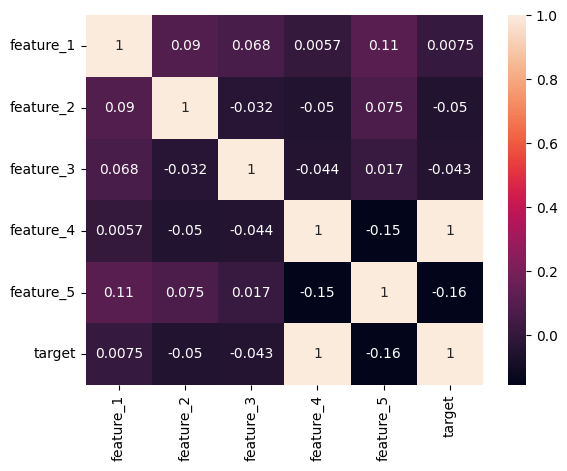

In [27]:
sns.heatmap(raw_df.corr(), annot = True)

**Висновки**

Найкраще у даному випадку генералізує модель Lasso (нижче значення RMSE на тренувальному та тестовому випадках).

У моделі Ridge спостерігається overfit (суттєво вирісло значення помилки на тестувальному наборі).

У моделі ElasticNet максимальне значення RMSE на обох сетах.

Проведено аналіз ознак. Модель Lasso "обнулила" багато ознак, в результаті залишилась тільки одна значуща ознака - feature_4.
Це підтверджується матрицею кореляції вхідного набору даних: feature_4 має кореляцію з таргетом 1, кореляція інших ознак з таргетом близька до 0.